In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
df=pd.read_csv("/content/house_price_reduced.csv")

In [ ]:
df


,OverallQual,GrLivArea,2ndFlrSF,TotalBsmtSF,BsmtFinSF1,1stFlrSF,LotArea,GarageArea,GarageCars,YearBuilt,LotFrontage,TotRmsAbvGrd,YearRemodAdd,OpenPorchSF,SalePrice
0,7,1710,854,856,706,856,8450,548,2,2003,65.0,8,2003,61,208500
1,6,1262,0,1262,978,1262,9600,460,2,1976,80.0,6,1976,0,181500
2,7,1786,866,920,486,920,11250,608,2,2001,68.0,6,2002,42,223500
3,7,1717,756,756,216,961,9550,642,3,1915,60.0,7,1970,35,140000
4,8,2198,1053,1145,655,1145,14260,836,3,2000,84.0,9,2000,84,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,694,953,0,953,7917,460,2,1999,62.0,7,2000,40,175000
1456,6,2073,0,1542,790,2073,13175,500,2,1978,85.0,7,1988,0,210000
1457,7,2340,1152,1152,275,1188,9042,252,1,1941,66.0,9,2006,60,266500
1458,5,1078,0,1078,49,1078,9717,240,1,1950,68.0,5,1996,0,142125


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1460 non-null   int64  
 1   GrLivArea     1460 non-null   int64  
 2   2ndFlrSF      1460 non-null   int64  
 3   TotalBsmtSF   1460 non-null   int64  
 4   BsmtFinSF1    1460 non-null   int64  
 5   1stFlrSF      1460 non-null   int64  
 6   LotArea       1460 non-null   int64  
 7   GarageArea    1460 non-null   int64  
 8   GarageCars    1460 non-null   int64  
 9   YearBuilt     1460 non-null   int64  
 10  LotFrontage   1201 non-null   float64
 11  TotRmsAbvGrd  1460 non-null   int64  
 12  YearRemodAdd  1460 non-null   int64  
 13  OpenPorchSF   1460 non-null   int64  
 14  SalePrice     1460 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 171.2 KB


In [ ]:
df.head(10)

,OverallQual,GrLivArea,2ndFlrSF,TotalBsmtSF,BsmtFinSF1,1stFlrSF,LotArea,GarageArea,GarageCars,YearBuilt,LotFrontage,TotRmsAbvGrd,YearRemodAdd,OpenPorchSF,SalePrice
0,7,1710,854,856,706,856,8450,548,2,2003,65.0,8,2003,61,208500
1,6,1262,0,1262,978,1262,9600,460,2,1976,80.0,6,1976,0,181500
2,7,1786,866,920,486,920,11250,608,2,2001,68.0,6,2002,42,223500
3,7,1717,756,756,216,961,9550,642,3,1915,60.0,7,1970,35,140000
4,8,2198,1053,1145,655,1145,14260,836,3,2000,84.0,9,2000,84,250000
5,5,1362,566,796,732,796,14115,480,2,1993,85.0,5,1995,30,143000
6,8,1694,0,1686,1369,1694,10084,636,2,2004,75.0,7,2005,57,307000
7,7,2090,983,1107,859,1107,10382,484,2,1973,NaN,7,1973,204,200000
8,7,1774,752,952,0,1022,6120,468,2,1931,51.0,8,1950,0,129900
9,5,1077,0,991,851,1077,7420,205,1,1939,50.0,5,1950,4,118000


In [ ]:
df.tail(10)

,OverallQual,GrLivArea,2ndFlrSF,TotalBsmtSF,BsmtFinSF1,1stFlrSF,LotArea,GarageArea,GarageCars,YearBuilt,LotFrontage,TotRmsAbvGrd,YearRemodAdd,OpenPorchSF,SalePrice
1450,5,1792,896,896,0,896,9000,0,0,1974,60.0,8,1974,45,136000
1451,8,1578,0,1573,0,1578,9262,840,3,2008,78.0,7,2009,36,287090
1452,5,1072,0,547,547,1072,3675,525,2,2005,35.0,5,2005,28,145000
1453,5,1140,0,1140,0,1140,17217,0,0,2006,90.0,6,2006,56,84500
1454,7,1221,0,1221,410,1221,7500,400,2,2004,62.0,6,2005,113,185000
1455,6,1647,694,953,0,953,7917,460,2,1999,62.0,7,2000,40,175000
1456,6,2073,0,1542,790,2073,13175,500,2,1978,85.0,7,1988,0,210000
1457,7,2340,1152,1152,275,1188,9042,252,1,1941,66.0,9,2006,60,266500
1458,5,1078,0,1078,49,1078,9717,240,1,1950,68.0,5,1996,0,142125
1459,5,1256,0,1256,830,1256,9937,276,1,1965,75.0,6,1965,68,147500


In [ ]:
df.size
#total no. of elements(7*1000)

21900

In [ ]:
df.isnull().sum()

,0
OverallQual,0
GrLivArea,0
2ndFlrSF,0
TotalBsmtSF,0
BsmtFinSF1,0
1stFlrSF,0
LotArea,0
GarageArea,0
GarageCars,0
YearBuilt,0


In [ ]:
x=df.drop('SalePrice',axis=1)
y=df['SalePrice']

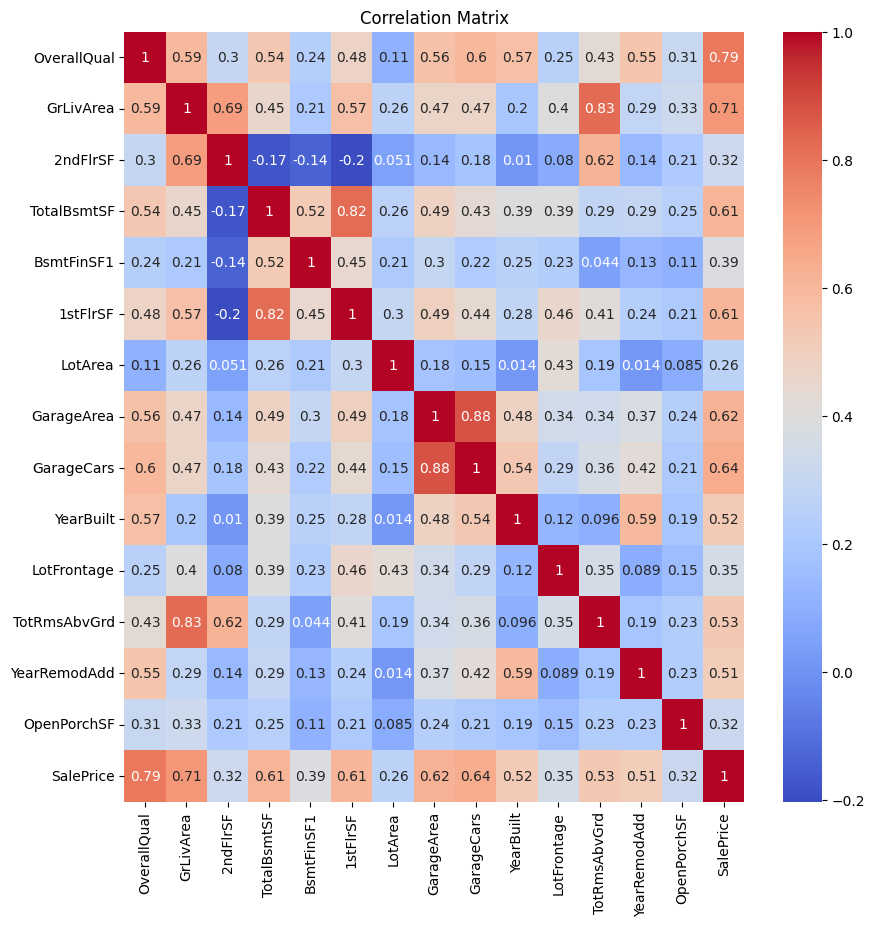

In [ ]:
# Plotting the correlation matrix "Heatmap"

# Setting the figure size for the plot
plt.figure(figsize=(10,10))

# Creating a heatmap of the correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# df.corr() calculates the correlation coefficients between numerical features
# annot=True adds the correlation values on the heatmap
# cmap='coolwarm' sets the color palette for the heatmap

# Adding a title to the heatmap
plt.title('Correlation Matrix')
# Displaying the heatmap
plt.show()

In [ ]:
#pairplot to visualize relationship between features

# creating a pairplot for the entire dataframe
sns.pairplot(df)
#This will create scatterplots for each pair of features along with  histrograms for individual features

#display the pairplot

plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
x = df.drop(['TotRmsAbvGrd','YearRemodAdd','SalePrice', 'LotFrontage','OpenPorchSF'], axis=1) #Drop all 3 columns in one go from the original df


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#initialize VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
#calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor (x.values, i)
for i in range(len(x.columns))]
print(vif_data)

       feature          VIF
0  OverallQual    46.817504
1    GrLivArea  1114.341545
2     2ndFlrSF   140.006538
3  TotalBsmtSF    25.806390
4   BsmtFinSF1     2.759759
5     1stFlrSF   699.556359
6      LotArea     2.417226
7   GarageArea    29.015118
8   GarageCars    32.916200
9    YearBuilt    25.172452


In [ ]:
x.head()

,OverallQual,GrLivArea,2ndFlrSF,TotalBsmtSF,BsmtFinSF1,1stFlrSF,LotArea,GarageArea,GarageCars,YearBuilt
0,7,1710,854,856,706,856,8450,548,2,2003
1,6,1262,0,1262,978,1262,9600,460,2,1976
2,7,1786,866,920,486,920,11250,608,2,2001
3,7,1717,756,756,216,961,9550,642,3,1915
4,8,2198,1053,1145,655,1145,14260,836,3,2000


In [ ]:
#Splitting the dataset into training and testing sets(80% train,20% test)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
'''train_test_split function: This function takes the input data (x and y)
 and splits it into four parts.
 test_size=0.2:Here, it's set to 0.2,
  meaning 20% of the data will be used for testing.'''

"train_test_split function: This function takes the input data (x and y)\n and splits it into four parts.\n test_size=0.2:Here, it's set to 0.2,\n  meaning 20% of the data will be used for testing."

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
score_lr = 100*lr_clf.score(x_test,y_test)
print(f'LR Model score = {score_lr:4.4f}%')
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_lr,"%")

LR Model score = 80.4336%
R2 Score :  70.77 %


In [ ]:


# prompt: randomforest model score mean cross validation not the r2 score

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

rf_clf = RandomForestRegressor()
rf_clf.fit(x_train, y_train)
score_rf = 100 * rf_clf.score(x_test, y_test)
print(f'Random Forest Regressor Model score = {score_rf:4.4f}%')
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred_rfr = rfr.predict(x_test)
R2_Score_rfr = round(r2_score(y_pred_rfr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_rfr,"%")

Random Forest Regressor Model score = 89.1472%
R2 Score :  85.07 %


In [ ]:
# prompt: DEcision tree Regressor model score

from sklearn.tree import DecisionTreeRegressor

dt_clf = DecisionTreeRegressor()
dt_clf.fit(x_train, y_train)
score_dt = 100 * dt_clf.score(x_test, y_test)
print(f'Decision Tree Regressor Model score = {score_dt:4.4f}%')

y_pred_dt = dt_clf.predict(x_test)
R2_Score_dt = round(r2_score(y_pred_dt, y_test) * 100, 2)
print("Decision Tree Regressor R2 Score : ", R2_Score_dt, "%")


Decision Tree Regressor Model score = 73.2145%
Decision Tree Regressor R2 Score :  68.84 %


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from numpy import mean

gbr = GradientBoostingRegressor(random_state=1)
gbr.fit(x_train, y_train)

# Cross-validation score as percentage
cv = cross_val_score(gbr, x_train, y_train, cv=5)
mean_cv_score = mean(cv) * 100
print(f"Mean Cross-Validation Score: {mean_cv_score:.2f}%")

# R2 score as percentage
y_pred_gbr = gbr.predict(x_test)
R2_Score_gbr = round(r2_score(y_pred_gbr, y_test) * 100, 2)
print(f"R2 Score: {R2_Score_gbr}%")

Mean Cross-Validation Score: 83.72%
R2 Score: 83.79%
